#                                   一个用于随机排班儿的脚本
## 引言
众所周知，我课题组承担的973项目已于近期正式开始，由于被试量较大加之扫描时间比较长，因此我写了这样一个脚本帮大家随机排班，时间分配的好不好全凭运气。  
扫描主试组的人员包括:
1. **Yinshan Wang(Group Leader）**
2. Jinfeng Wu
3. Quan Zhou
4. Yiwen Zhang
5. Zhengzheng Deng
6. Bin Lu
7. Jiaqi Gao

如果你对这样的安排有何不满，请随时联系我的邮箱。  
那么，下面就由我来简要地介绍一下这个脚本。  
首先，将python必须的组件加载。


In [94]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## 创建空白值班表
  创建一个数值全为0的$31(天)*7(人)$的dataframe,用数字1 - 7代表周一至周日，并把他们加入到dataframe中。  
  选择周1-周5的工作日。具体结果请见下面的表格。

In [95]:
staff_names = ['Yinshan','Jinfeng','Quan','Yiwen','Zheng','Bin','Jiaqi']  #主试姓名
duty_dates = np.zeros((31,7))                                             #生成一个行为日期，列为主试的array
date_range = pd.date_range('8/1/2016','8/31/2016')                        #值班日期8月1日-30日
date_range = date_range.strftime('%Y-%m-%d')
Schedule = pd.DataFrame(duty_dates,columns=staff_names,index=date_range)   #生成31天*7人的DataFrame
Weekdays = [i+1 for i in range(7)]                                         #一个用1-7代表周一至周日的list
Weekdays_Aug = [Weekdays[i%7] for i in range(31)]                          #每月对应周几
Schedule['Weekdays']=Weekdays_Aug                                          #加入到dataframe中
Schedule=Schedule[Schedule['Weekdays']<=5]                                  #筛选出工作日
Schedule

,Yinshan,Jinfeng,Quan,Yiwen,Zheng,Bin,Jiaqi,Weekdays
2016-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2016-08-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2016-08-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2016-08-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2016-08-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2016-08-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2016-08-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2016-08-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2016-08-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2016-08-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


## 随机排班
  使用np.eye(7)创建一个单位矩阵，用以代表按顺序给每位主试安排值班日期。再使用np.permutation()将其顺序打乱，最后使用np.vstack()命令将28天的随机后的顺序合并成一个28行7列的array。截取和dataframe行数相等的数值并替换dataframe原始值。

In [96]:
np.random.seed(973)
Shift_Duty=np.vstack((np.random.permutation(np.eye(7)),np.random.permutation(np.eye(7)),np.random.permutation(np.eye(7)),np.random.permutation(np.eye(7)),np.random.permutation(np.eye(7))))
#随机分配配每天的主试，
Schedule.ix[:,:7]=Shift_Duty[:Schedule.shape[0],]
Wang_Yinshan=Schedule['Yinshan'][Schedule['Yinshan']==1]
Schedule

,Yinshan,Jinfeng,Quan,Yiwen,Zheng,Bin,Jiaqi,Weekdays
2016-08-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2016-08-02,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2016-08-03,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
2016-08-04,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
2016-08-05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5
2016-08-08,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2016-08-09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2016-08-10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
2016-08-11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
2016-08-12,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5


## 将排班表可视化
使用seaborn包里的heatmap，将排班表可视化。这里我用到的colorbar是左老师上次讲到的viridis。

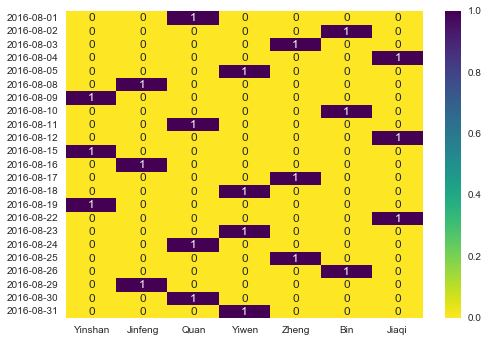

In [97]:
import seaborn as sns
sns.set()
cmp=plt.cm.viridis_r
ax=sns.heatmap(Schedule.ix[:,:7],cmap=cmp,vmax=1,vmin=0,annot=True)